In [1]:
import yfinance as yf 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR,SVC
from sklearn.metrics import classification_report,confusion_matrix,root_mean_squared_error

In [3]:
ticker = "NVDA"
df=yf.download(ticker,start="2020-01-01", auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971745,5.971745,5.892342,5.942871,237536000
2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2020-01-06,5.900806,5.906033,5.756684,5.782820,262636000
2020-01-07,5.972245,6.018045,5.884128,5.929182,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000


In [4]:
df.columns = df.columns.get_level_values(0)

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.971745,5.971745,5.892342,5.942871,237536000
2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2020-01-06,5.900806,5.906033,5.756684,5.782820,262636000
2020-01-07,5.972245,6.018045,5.884128,5.929182,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000


Feature name	What it means
Close	    Today’s closing price
Close_lag1	Yesterday’s closing price
MA5	        5-day moving average of closing price
MA10	    10-day moving average
Return1	    Percentage return compared to previous day: (Close - Close_lag1)/Close_lag1
Volume	    Today’s traded volume

In [6]:
df['Close_lag1']=df['Close'].shift(1)
df['MA5']=df['Close'].rolling(window=5).mean()
df['MA10']=df['Close'].rolling(window=10).mean()
df['Return1']= (df['Close']-df['Close_lag1'])/df['Close_lag1'];
df['target_tom']=df['Close'].shift(-1)
df['Target_up_down']=(df['target_tom']>df['Close']).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1371 entries, 2020-01-02 to 2025-06-16
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1371 non-null   float64
 1   High            1371 non-null   float64
 2   Low             1371 non-null   float64
 3   Open            1371 non-null   float64
 4   Volume          1371 non-null   int64  
 5   Close_lag1      1370 non-null   float64
 6   MA5             1367 non-null   float64
 7   MA10            1362 non-null   float64
 8   Return1         1370 non-null   float64
 9   target_tom      1370 non-null   float64
 10  Target_up_down  1371 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 123.2 KB


In [8]:
df.columns


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Close_lag1', 'MA5', 'MA10',
       'Return1', 'target_tom', 'Target_up_down'],
      dtype='object', name='Price')

In [9]:
df=df.dropna()

In [10]:
df.head()

Price,Close,High,Low,Open,Volume,Close_lag1,MA5,MA10,Return1,target_tom,Target_up_down
Date,,,,,,,,,,,
2020-01-15,6.112633,6.190295,6.086746,6.167893,263104000,6.155199,6.134140,6.037510,-0.006915,6.196269,1
2020-01-16,6.196269,6.202243,6.142752,6.166150,284192000,6.112633,6.163562,6.059963,0.013682,6.204982,1
2020-01-17,6.204982,6.222904,6.157439,6.215436,253792000,6.196269,6.188254,6.092845,0.001406,6.171628,0
2020-01-21,6.171628,6.205231,6.137526,6.168391,217916000,6.204982,6.168142,6.119927,-0.005375,6.225641,1
2020-01-22,6.225641,6.312263,6.198011,6.216929,239240000,6.171628,6.182230,6.145266,0.008752,6.294093,1


In [11]:
from sklearn.preprocessing import StandardScaler
X=df.drop(['target_tom','Target_up_down'], axis=1)
y_reg=df['target_tom']
y_clas=df['Target_up_down']
scaler=StandardScaler()
scaler2=StandardScaler()
X_scaled=scaler.fit_transform(X)
y_reg_scaled=scaler2.fit_transform(y_reg.to_numpy().reshape(-1, 1))

In [12]:
X_train, X_test, y_train_reg, y_test_reg , y_train_clas, y_test_clas = train_test_split(X_scaled, y_reg_scaled , y_clas, test_size=0.30, random_state=101,stratify=y_clas)

In [13]:
m_reg=SVR()
m_reg.fit(X_train,y_train_reg.ravel())

SVR()

<Axes: ylabel='Density'>

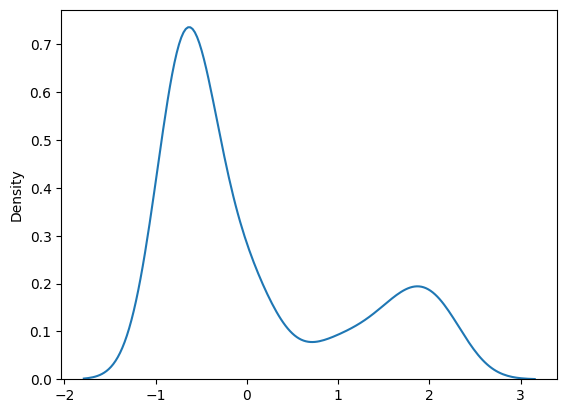

In [48]:
pred_reg=m_reg.predict(X_test)
sns.kdeplot(pred_reg)

In [50]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train_reg.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.984 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.992 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.984 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
grid.best_estimator_

SVR(C=1000, gamma=0.001)

In [51]:
grid_pred=grid.predict(X_test)

<Axes: ylabel='Density'>

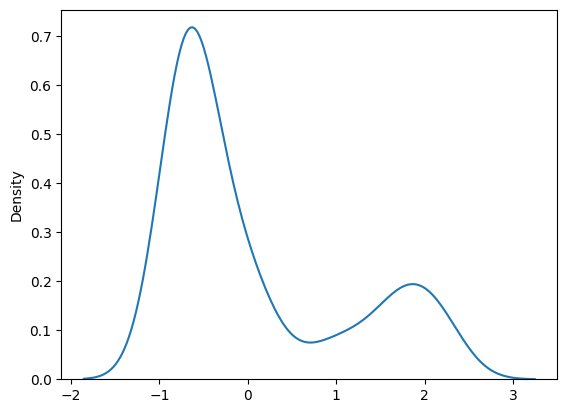

In [52]:
sns.kdeplot(grid_pred)

In [60]:
print(root_mean_squared_error(grid_pred,y_test_reg.ravel()))

0.05599991056629109


<Axes: >

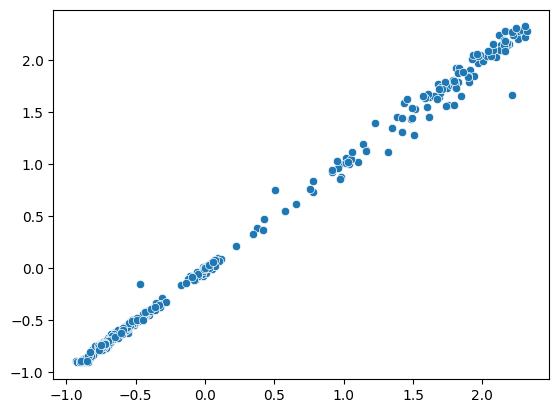

In [61]:
sns.scatterplot(x=grid_pred,y=y_test_reg.ravel())

In [23]:
print(classification_report(pred_clas,y_test_clas))
print('\n')
print(confusion_matrix(pred_clas,y_test_clas))

              precision    recall  f1-score   support

           0       0.08      0.47      0.14        32
           1       0.92      0.55      0.69       376

    accuracy                           0.54       408
   macro avg       0.50      0.51      0.41       408
weighted avg       0.86      0.54      0.64       408



[[ 15  17]
 [171 205]]


In [24]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train_clas)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [69]:
grid_clas=grid.predict(X_test)

In [70]:
print(classification_report(grid_clas,y_test_clas,zero_division=0))
print('\n')
print(confusion_matrix(grid_clas,y_test_clas))

              precision    recall  f1-score   support

           0       0.27      0.45      0.34       114
           1       0.72      0.54      0.62       294

    accuracy                           0.51       408
   macro avg       0.50      0.49      0.48       408
weighted avg       0.59      0.51      0.54       408



[[ 51  63]
 [135 159]]


<Axes: xlabel='Date'>

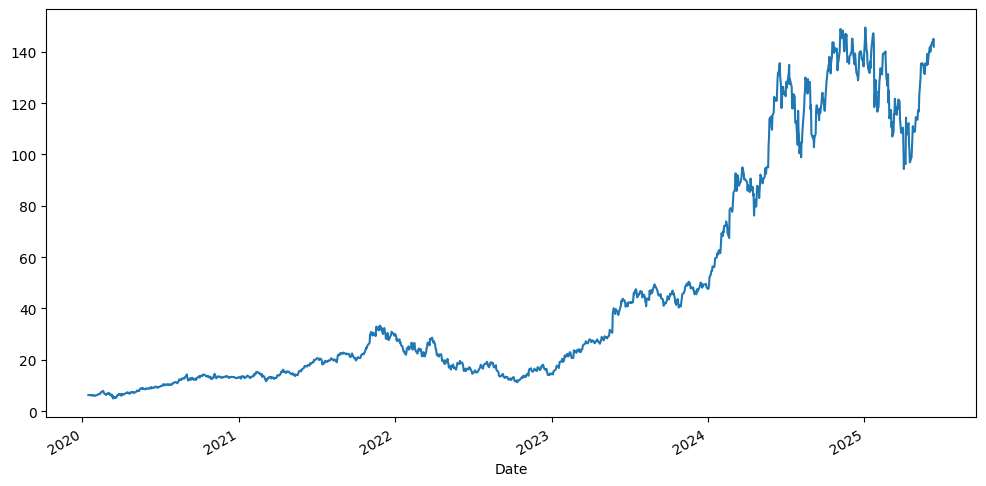

In [71]:
df['target_tom'].plot(figsize=(12,6))

In [72]:
df['Target_up_down'].value_counts()

Target_up_down
1    740
0    620
Name: count, dtype: int64

In [73]:
print(y_test_clas.value_counts())

Target_up_down
1    222
0    186
Name: count, dtype: int64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2020-01-15 to 2025-06-12
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1360 non-null   float64
 1   High            1360 non-null   float64
 2   Low             1360 non-null   float64
 3   Open            1360 non-null   float64
 4   Volume          1360 non-null   int64  
 5   Close_lag1      1360 non-null   float64
 6   MA5             1360 non-null   float64
 7   MA10            1360 non-null   float64
 8   Return1         1360 non-null   float64
 9   target_tom      1360 non-null   float64
 10  Target_up_down  1360 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 122.2 KB


from sklearn.preprocessing import StandardScaler
X=df.drop(['target_tom','Target_up_down'], axis=1)
y_reg=df['target_tom']
y_clas=df['Target_up_down']
scaler=StandardScaler()
scaler2=StandardScaler()
X_scaled=scaler.fit_transform(X)
y_reg_scaled=scaler2.fit_transform(y_reg.to_numpy().reshape(-1, 1))
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train_reg.ravel())

In [62]:
import joblib
joblib.dump(grid.best_estimator_,'regression_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(scaler2, 'target_scaler.pkl')

['target_scaler.pkl']